<a href="https://colab.research.google.com/github/sydoky/Covolutional-Neural-Network-CNN-/blob/main/Covolutional_Neural_Network(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [5]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Angle"]

# **Data Reshape**

In [6]:
X_train_full=X_train_full.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28, 1)

# **Data Normalization**

In [7]:
X_train_n=X_train_full/255
X_test_n=X_test/255

In [8]:
X_valid, X_train=X_train_n[:5000], X_train_n[5000:]
y_valid, y_train=y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1, padding="valid", activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
model_history=model.fit(X_train,y_train,epochs=64, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/64
860/860 [==============================] - 37s 42ms/step - loss: 0.8766 - accuracy: 0.6988 - val_loss: 0.7540 - val_accuracy: 0.7332
Epoch 2/64
860/860 [==============================] - 36s 42ms/step - loss: 0.5386 - accuracy: 0.8046 - val_loss: 0.4903 - val_accuracy: 0.8212
Epoch 3/64
860/860 [==============================] - 37s 42ms/step - loss: 0.4810 - accuracy: 0.8261 - val_loss: 0.9134 - val_accuracy: 0.7126
Epoch 4/64
860/860 [==============================] - 37s 43ms/step - loss: 0.4440 - accuracy: 0.8413 - val_loss: 0.4157 - val_accuracy: 0.8566
Epoch 5/64
860/860 [==============================] - 37s 43ms/step - loss: 0.4201 - accuracy: 0.8500 - val_loss: 0.4358 - val_accuracy: 0.8478
Epoch 6/64
860/860 [==============================] - 37s 43ms/step - loss: 0.3956 - accuracy: 0.8582 - val_loss: 0.3753 - val_accuracy: 0.8712
Epoch 7/64
860/860 [==============================] - 38s 44ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 0.4065 - val_accuracy:

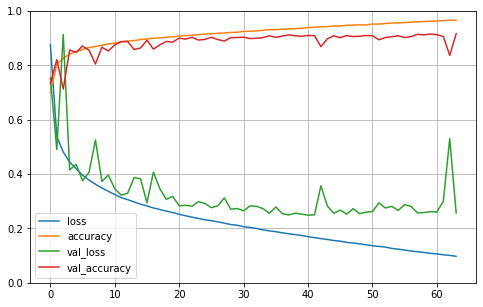

In [15]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
ev=model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2669 - accuracy: 0.9155


In [21]:
X_new=X_test[:3]

In [24]:
y_pred=(model.predict(X_test) > 0.5).astype("int32")


In [25]:
y_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [27]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [30]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
X_test

AxesImage(54,36;334.8x217.44)


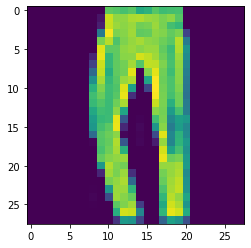

In [35]:
print(plt.imshow(X_test[5].reshape(28,28)))